# 2024-Boston-Marathon-Weather-and-Splits 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Loading and Exploring the Dataset

In [2]:
df = pd.read_csv('Athletes.csv')
print(df.head())

   Bib    Zip  Age Age Group Gender  First Half  Second Half  Finish  \
0   25  93730   30  Under 35      M        3832         3961    7793   
1    9  97124   32  Under 35      M        3845         4059    7904   
2   20  80922   40     40-44      M        3795         4157    7952   
3   46   2136   38     35-39      M        3997         4065    8062   
4   51   6119   26  Under 35      M        3979         4198    8177   

   Positive Split  Percent Change  
0             129        0.033664  
1             214        0.055657  
2             362        0.095389  
3              68        0.017013  
4             219        0.055039  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17220 entries, 0 to 17219
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bib             17220 non-null  int64  
 1   Zip             17220 non-null  int64  
 2   Age             17220 non-null  int64  
 3   Age Group       17220 non-null  object 
 4   Gender          17220 non-null  object 
 5   First Half      17220 non-null  int64  
 6   Second Half     17220 non-null  int64  
 7   Finish          17220 non-null  int64  
 8   Positive Split  17220 non-null  int64  
 9   Percent Change  17220 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB
None


# Data Preprocessing

In [4]:
df[['Bib','Age','Gender','First Half','Second Half','Positive Split']]

,Bib,Age,Gender,First Half,Second Half,Positive Split
0,25,30,M,3832,3961,129
1,9,32,M,3845,4059,214
2,20,40,M,3795,4157,362
3,46,38,M,3997,4065,68
4,51,26,M,3979,4198,219
...,...,...,...,...,...,...
17215,7691,45,M,7286,17096,9810
17216,7771,63,M,10891,13701,2810
17217,15778,66,M,11957,12829,872
17218,7318,40,M,11536,13915,2379


In [5]:
df.dropna(inplace=True)

# Feature Engineering

In [6]:
df['Split Difference'] = df['First Half'] - df['Second Half']


# Model Building

In [7]:
X = df[['First Half','Second Half']]
y=df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation


In [8]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-Squared: {r2}')


Mean Absolute Error: 10.275231219868
Mean Squared Error: 152.3445266201889
Root Mean Squared Error: 12.342792496845634
R-Squared: 0.06069760548332659


# Data Visualization

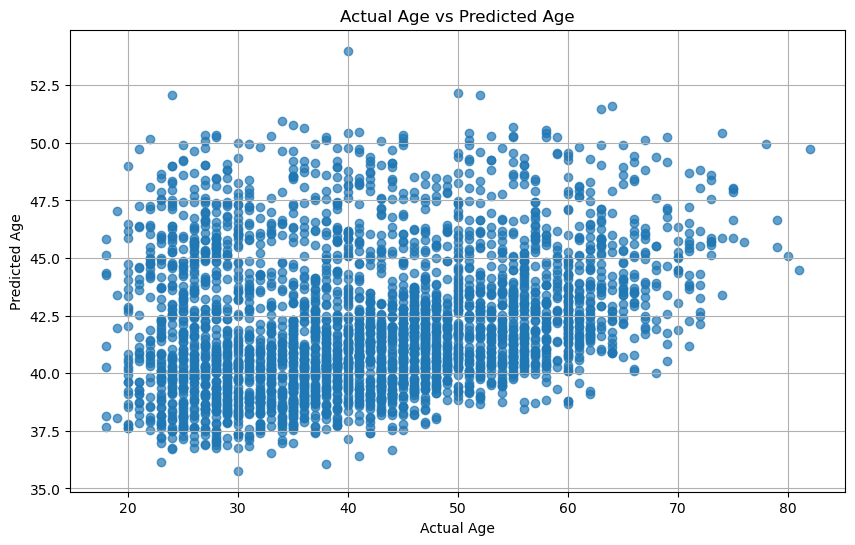

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.title('Actual Age vs Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.grid(True)
plt.show()

# Conclusion:-
The performance of the Linear Regression model in predicting the age of athletes based on their marathon splits is relatively poor. The high error values (MAE and RMSE) and low R² value indicate that the model's predictions are not very accurate. The low R² value, in particular, suggests that the first and second half marathon splits are not strong predictors of an athlete's age.